<img src="Images/02-Title_Image.png" style="width: 600px;"/> 

<br>

# Web Scraping

## Step 1: Obtaining The HTML

In [1]:
import requests

url = 'https://companiesmarketcap.com/page/1/'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0'

response = requests.get(url, headers={'user-agent': user_agent})

if response.ok:
    message = 'The request was successfully received, understood, and accepted.'
else:
    message = 'The request was not successful.'

print('Status Code:', response.status_code)
print(message)

Status Code: 200
The request was successfully received, understood, and accepted.


Let us break down the code of this cell:

- Firstly, we need to import the `requests` library.
- Then, we specify the URL of the webpage we want to scrape. Also, some pages require defining a user agent, i.e. a string identifying the browser and operating system to the web server. Our browser sends its user agent to every website we connect to. We can easily find [our browser's user agent](https://www.whatismybrowser.com/detect/what-is-my-user-agent) or [any other user agent](https://developers.whatismybrowser.com/useragents/explore/). In our case, [companiesmarketcap.com](https://companiesmarketcap.com/) does not require it; however, it is good practice to define the user agent.
- We send a GET request to the specified URL using the `get()` method and save the response object to a separate variable called `response`.
- Finally, we can check the response's status code and see if the request was successful.

We can check the type of the `response` variable:

In [2]:
type(response)

requests.models.Response

<br>

## Step 2: Parsing The HTML

Once the request is successful, we can convert the response object to a Beautiful Soup object, representing the document as a nested data structure. We create a Beautiful Soup object by passing two arguments:

- The raw HTML content in bytes (using the `.content` attribute) and
- The HTML parser we want to use.

There are [three options](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for parsers with `Beautiful Soup`: `html.parser`, `lxml`, and `html5lib`.

In [3]:
from bs4 import BeautifulSoup

html = response.content
parser = 'lxml'

soup = BeautifulSoup(html, parser)
type(soup)

bs4.BeautifulSoup

For viewing the parse tree, a good suggestion is using the `prettify()` method which turns a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string. Due to its considerable length, we will only print the first 3000 characters.

In [4]:
print(soup.prettify()[:1500])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Companies ranked by Market Cap - CompaniesMarketCap.com
  </title>
  <meta charset="utf-8"/>
  <link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/img/icons/apple-icon-180x180.pn

<br>

## Step 3: Extracting The Data

We can now start extracting useful information from the HTML content. By inspecting the source code, we observe that the whole table of companies is described by a HTML element with the `tbody` tag, which encapsulates a set of table rows, indicating that they comprise the body of the table ([Source](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tbody)).

<br><br>

<img src="Images/03-tbody.png" style="width: 800px;"/>  

<br><br>

To retrieve that piece of information, we need Beautiful Soup's `find()` function. This function takes the name of the desired tag as string input and returns the first occurrence of that particular tag. 

In [5]:
table = soup.find('tbody')

<br>

### Scraping One Row

We can extract the first row/company in the table by applying the same method to the `table` variable. The first row (and all rows) is described by an HTML element with the `<tr>` tag (this tag defines a row in an HTML table).

<br><br>

<img src="Images/04-tr.png" style="width: 800px;"/> 

In [6]:
first_row = table.find('tr')
print(first_row.prettify())

<tr>
 <td class="td-right" data-sort="1">
  1
 </td>
 <td class="name-td">
  <div class="float-left pt-1">
   <img alt="Apple logo" class="company-logo" loading="lazy" src="/img/company-logos/80/AAPL.png"/>
  </div>
  <div class="name-div">
   <a href="/apple/marketcap/">
    <div class="company-name">
     Apple
    </div>
    <div class="company-code">
     <span class="rank d-none">
     </span>
     AAPL
    </div>
   </a>
  </div>
 </td>
 <td class="td-right" data-sort="2414401028096">
  $2.414 T
 </td>
 <td class="td-right" data-sort="14606">
  $146.06
 </td>
 <td class="rh-sm" data-sort="-183">
  <span class="percentage-red">
   -1.83%
  </span>
 </td>
 <td class="p-0 sparkline-td red">
  <svg>
   <path d="M0,39 L5,39 L10,41 L15,40 L20,30 L25,29 L30,22 L35,25 L40,38 L45,37 L50,32 L55,27 L60,27 L65,32 L70,34 L75,31 L80,15 L85,20 L90,17 L95,13 L100,11 L105,11 L110,3 L115,8 L120,12 L125,29 L130,27 L135,32 L140,29 L145,30 L150,39 L155,39">
   </path>
  </svg>
 </td>
 <td>
  🇺🇸
  <sp

<br>

#### Name

We can use the newly created `first_row` variable and repeat the same process for retrieving more specific information. For instance, the company's name has a `<div>` tag with a `class` attribute equal to `company-name`. 

<br><br>

<img src="Images/05-company-name.png" style="width: 800px;"/> 

<br><br>

Beautiful Soup's `find()` method allows us to search for tags based on their attributes, in addition to their name. This is achieved by including the name and value of the attributes as a dictionary.

In [7]:
first_row.find('div', {'class': 'company-name'})

<div class="company-name">Apple</div>

To retrieve the content of the HTML element, we can use the `.text` attribute:

In [8]:
company = first_row.find('div', {'class': 'company-name'}).text
company

'Apple'

<br>

#### Ticker

In [9]:
ticker = first_row.find('div', {'class': 'company-code'}).text
ticker

'AAPL'

<br>

#### Market Cap.

In [10]:
market_cap = first_row.find_all('td', {'class': 'td-right'})[1].text
market_cap

'$2.414 T'

<br>

#### Price

In [11]:
price = first_row.find_all('td', {'class': 'td-right'})[2].text
price

'$146.06'

<br>

#### Daily Change

In [12]:
today = first_row.find_all('span')[1].text
today

'-1.83%'

<br>

#### Country

In [13]:
country = first_row.find_all('span', {'class': 'responsive-hidden'})[0].text
country

'USA'

We can summarise the data by creating a Pandas DataFrame:

In [14]:
import pandas as pd

first_row = pd.DataFrame(
    {
        'Company': company,
        'Ticker': ticker,
        'Market Cap.': market_cap,
        'Price': price,
        'Daily Change': today,
        'Country': country
    },
    index=[0])

first_row

Company Ticker Market Cap.    Price Daily Change Country
0   Apple   AAPL    $2.414 T  $146.06       -1.83%     USA

<br>

### Scraping One Page

We are now ready to scale our approach to retrieving data from the entirety of the first page. To achieve this, we need the `find_all()` function, which, as the name suggests, extracts all the occurrences of the specified tag.

In [15]:
table = table.find_all('tr')

In [16]:
len(table)

100

The length of the `table` variable confirms that all rows/companies of the table were successfully extracted. 

We can use a for loop to iterate over all rows of the page.  

In [17]:
companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

for i in range(len(table)):
    companies.append(table[i].find('div', {'class': 'company-name'}).text)
    tickers.append(table[i].find('div', {'class': 'company-code'}).text)
    market_caps.append(table[i].find_all('td', {'class': 'td-right'})[1].text)
    prices.append(table[i].find_all('td', {'class': 'td-right'})[2].text)
    changes.append(table[i].find_all('span')[1].text)
    countries.append(table[i].find_all('span', {'class': 'responsive-hidden'})[0].text)

We can create a DataFrame for the first page and print the first and last three rows to check if everything is correct:

In [18]:
first_page_df = pd.DataFrame({
    'Company': companies,
    'Ticker': tickers,
    'Market Cap': market_caps,
    'Price': prices,
    'Daily Change': changes,
    'Country': countries
})

first_page_df.iloc[[0, 1, 2, 97, 98, 99]]

Company Ticker Market Cap    Price Daily Change    Country
0                  Apple   AAPL   $2.414 T  $146.06       -1.83%        USA
1              Microsoft   MSFT   $2.253 T  $299.87       -1.75%        USA
2      Alphabet (Google)   GOOG   $1.881 T   $2,829       -2.02%        USA
97                   AIA  AAIGF  $138.26 B   $11.43        0.53%  Hong Kong
98             HDFC Bank    HDB  $136.93 B   $74.20       -0.96%      India
99  Bristol-Myers Squibb    BMY  $136.23 B   $61.31        0.13%        USA

<br>

### Scraping Multiple Pages

Scraping multiple pages is a bit more challenging. The most significant modification compared to our one-page script is making a separate request for each individual page. Therefore, we need a for loop. 

After inspecting the URLs of the first few pages, we observe that the only thing that changes from page to page is the number of the page that is included between the forward slashes at the end of the end (highlighted in orange in the following image). Consequently, we only need to vary one parameter of the URL as the for loop progresses.

<br><br>

<img src="Images/06-Link_format.png" style="width: 600px;"/> 

<br><br>

We also want to limit the rate of requests. This can be achieved by using the `sleep()` function of the time package, which pauses the execution of the loop for a specified amount of seconds.

In our example, we will scape the first 50 pages with a random delay between requests.

In [19]:
# Import the two new required packages
from time import sleep
import random

# Initialise an empty DataFrame
columns = ['Company', 'Ticker', 'Market Cap', 'Price', 'Daily Change', 'Country']
df = pd.DataFrame(columns=columns)

num_of_pages = 54
for p in range(1, num_of_pages+1):

    # 01. Define the url of the site
    url = 'https://companiesmarketcap.com/page/{}/'.format(p)

    # 02. Make a get request and print a message about whether it was successful or not
    while True:
        response = requests.get(url)

        if response.ok: break

        print('  Page {} - {}'.format(p, '!The request was not accepted!'))
        sleep(random.uniform(5, 10))

    message = 'The request was successfully received, understood, and accepted.' if response.ok else 'The request was not successful.'
    print('Page {} - {}'.format(p, message))

    # 03. Extract the raw HTML and create a Beatiful Soup object
    html = response.content
    soup = BeautifulSoup(html, 'lxml')

    # 04. Retrieve data for all games
    table = soup.find('tbody').find_all('tr')

    # 05. Retrieve data for each feauture individually
    companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

    for i in range(len(table)):
        companies.append(table[i].find('div', {'class': 'company-name'}).text)
        tickers.append(table[i].find('div', {'class': 'company-code'}).text)
        market_caps.append(table[i].find_all('td', {'class': 'td-right'})[1].text)
        prices.append(table[i].find_all('td', {'class': 'td-right'})[2].text)
        changes.append(table[i].find_all('span')[1].text)
        countries.append(table[i].find_all('span', {'class': 'responsive-hidden'})[0].text)

    # 06. Append to the existing DataFrame
    dfCurrent = pd.DataFrame({
        'Company': companies,
        'Ticker': tickers,
        'Market Cap': market_caps,
        'Price': prices,
        'Daily Change': changes,
        'Country': countries
    })
    df = pd.concat([df, dfCurrent])

    # 07. Add a random delay time between 5 and 20 s
    sleep(random.uniform(5, 20))

Page 1 - The request was successfully received, understood, and accepted.
Page 2 - The request was successfully received, understood, and accepted.
Page 3 - The request was successfully received, understood, and accepted.
Page 4 - The request was successfully received, understood, and accepted.
Page 5 - The request was successfully received, understood, and accepted.
Page 6 - The request was successfully received, understood, and accepted.
Page 7 - The request was successfully received, understood, and accepted.
Page 8 - The request was successfully received, understood, and accepted.
Page 9 - The request was successfully received, understood, and accepted.
Page 10 - The request was successfully received, understood, and accepted.
Page 11 - The request was successfully received, understood, and accepted.
Page 12 - The request was successfully received, understood, and accepted.
Page 13 - The request was successfully received, understood, and accepted.
Page 14 - The request was successf

It appears that all pages were scraped successfully! Let us view the first and last two rows of the whole dataset.

In [20]:
df.iloc[[0, 1, -2, -1]]

Company Ticker Market Cap    Price Daily Change  \
0                           Apple   AAPL   $2.414 T  $146.06       -1.83%   
1                       Microsoft   MSFT   $2.253 T  $299.87       -1.75%   
99   Youngevity International\r\n   YGYI    $3.73 M    $0.11      -15.38%   
0   Commercial International Bank  CIN.F       $0 M    $3.52       -1.99%   

   Country  
0      USA  
1      USA  
99     USA  
0    Egypt

Notice that the last two indices are '99' and '0', even though we scraped 54 pages, each containing 100 companiess. That is due to the way we concatenated the pages. We can easily fix this issue using the `reset_index()` method.

In [21]:
df.reset_index(drop=True, inplace=True)
df.iloc[[0, 1, -2, -1]]

Company Ticker Market Cap    Price Daily Change  \
0                             Apple   AAPL   $2.414 T  $146.06       -1.83%   
1                         Microsoft   MSFT   $2.253 T  $299.87       -1.75%   
5299   Youngevity International\r\n   YGYI    $3.73 M    $0.11      -15.38%   
5300  Commercial International Bank  CIN.F       $0 M    $3.52       -1.99%   

     Country  
0        USA  
1        USA  
5299     USA  
5300   Egypt

Finally, we can export the dataset to a CSV file by using the `read_csv()` method. This is good practice since we can just import the dataset next time we start the kernel instead of rescraping the website. 

Note: In some cases, the string for the company's name ends with '\r\n'. This prints a new line, which, when opening the CSV file, gives the impression that the cell is blank. We can remove it by using the `strip()` method.

In [22]:
df['Company'] = df['Company'].str.strip('\r\n')

df.to_csv('Companies-Raw.csv', index=False)

<br>

# Cleaning The Scraped Dataset

Web scraping is now complete, and all scraped data are saved in a CSV file. However, we need to modify a few things to be able to visualise the data.

In [23]:
df = pd.read_csv('Companies-Raw.csv')
df.head()

Company   Ticker Market Cap    Price Daily Change    Country
0              Apple     AAPL   $2.414 T  $146.06       -1.83%        USA
1          Microsoft     MSFT   $2.253 T  $299.87       -1.75%        USA
2  Alphabet (Google)     GOOG   $1.881 T   $2,829       -2.02%        USA
3       Saudi Aramco  2222.SR   $1.865 T    $9.33       -0.43%  S. Arabia
4             Amazon     AMZN   $1.753 T   $3,463       -0.74%        USA

The `info()` method can give us valuable information such as the type of each feature and the number of missing values:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       5301 non-null   object
 1   Ticker        5301 non-null   object
 2   Market Cap    5301 non-null   object
 3   Price         5301 non-null   object
 4   Daily Change  5301 non-null   object
 5   Country       5301 non-null   object
dtypes: object(6)
memory usage: 248.6+ KB


There are no missing values in the dataset. However, three columns (‘Market Cap’, ‘Price’, ‘Daily Change’) are of the object type and should be converted to a numerical type (float).

In [25]:
df['Market Cap'] = df['Market Cap'].str.strip('$')

In [26]:
def function(x):
    if x[1] == 'T':
        mul = 1E+12
    elif x[1] == 'B':
        mul = 1E+9
    elif x[1] == 'M':
        mul = 1E+6

    return float(x[0]) * mul

df['Market Cap'] = df['Market Cap'].str.split().apply(function).astype(float)

In [27]:
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [28]:
df['Daily Change'] = df['Daily Change'].str.strip('%').astype(float)
df.rename(columns={'Daily Change': 'Daily Change (%)'}, inplace=True)

In [29]:
df.head()

Company   Ticker    Market Cap    Price  Daily Change (%)  \
0              Apple     AAPL  2.414000e+12   146.06             -1.83   
1          Microsoft     MSFT  2.253000e+12   299.87             -1.75   
2  Alphabet (Google)     GOOG  1.881000e+12  2829.00             -2.02   
3       Saudi Aramco  2222.SR  1.865000e+12     9.33             -0.43   
4             Amazon     AMZN  1.753000e+12  3463.00             -0.74   

     Country  
0        USA  
1        USA  
2        USA  
3  S. Arabia  
4        USA

In [31]:
df.to_csv('Companies-Improved.csv', index=False)

<br>

# Data Visualisation

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

facecolor = '#2F4558'
plt.rcParams['figure.facecolor'] = facecolor
plt.rcParams['axes.facecolor'] = facecolor
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

font_size = 22
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size - 6
plt.rcParams['ytick.labelsize'] = font_size - 6
plt.rcParams['legend.fontsize'] = font_size - 6

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Arial'

In [5]:
no_countries = df['Country'].nunique()

In [6]:
df_countries = pd.DataFrame({'Country': df['Country'].unique()})

fig = px.choropleth(df_countries,
                    locations='Country',
                    color_discrete_sequence=np.full(no_countries, 'lightcoral'),
                    locationmode='country names',
                    fitbounds='locations')

fig.update_traces(showlegend=False)
fig.update_geos(resolution=50, visible=True)

fig.show(renderer='svg');

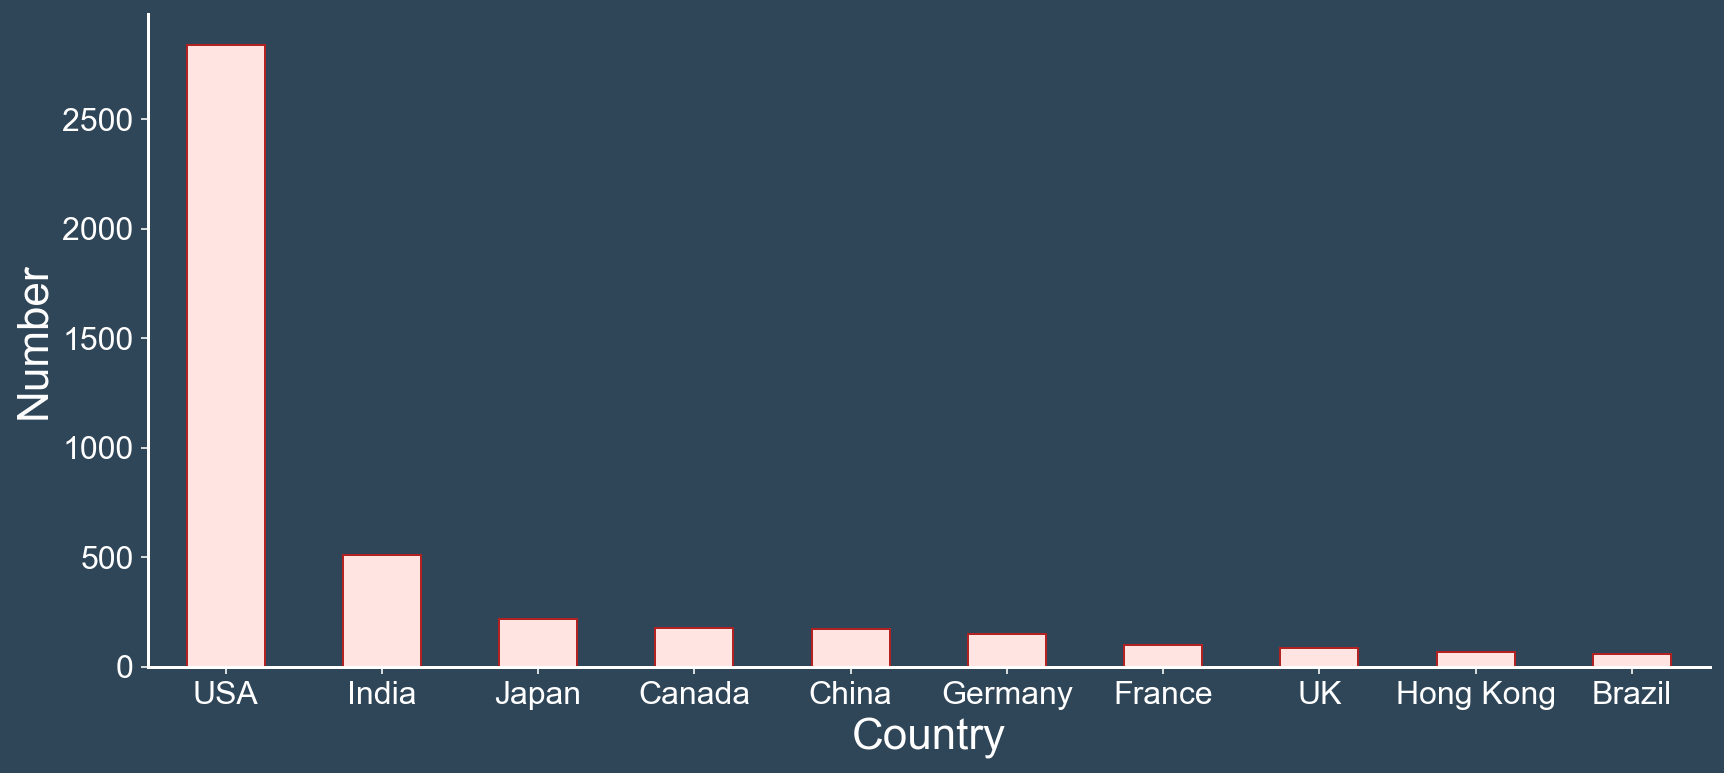

In [7]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#2F4558')

df['Country'].value_counts().head(10).plot(kind='bar',
                                           color='mistyrose',
                                           edgecolor='firebrick',
                                           ax=ax)

ax.set(xlabel='Country', ylabel='Number')
ax.tick_params(axis='x', labelrotation=0);

In [8]:
df_total_mc = df.groupby('Country')['Market Cap'].sum().to_frame()
df_total_mc.sort_values(by='Market Cap', ascending=False, inplace=True)

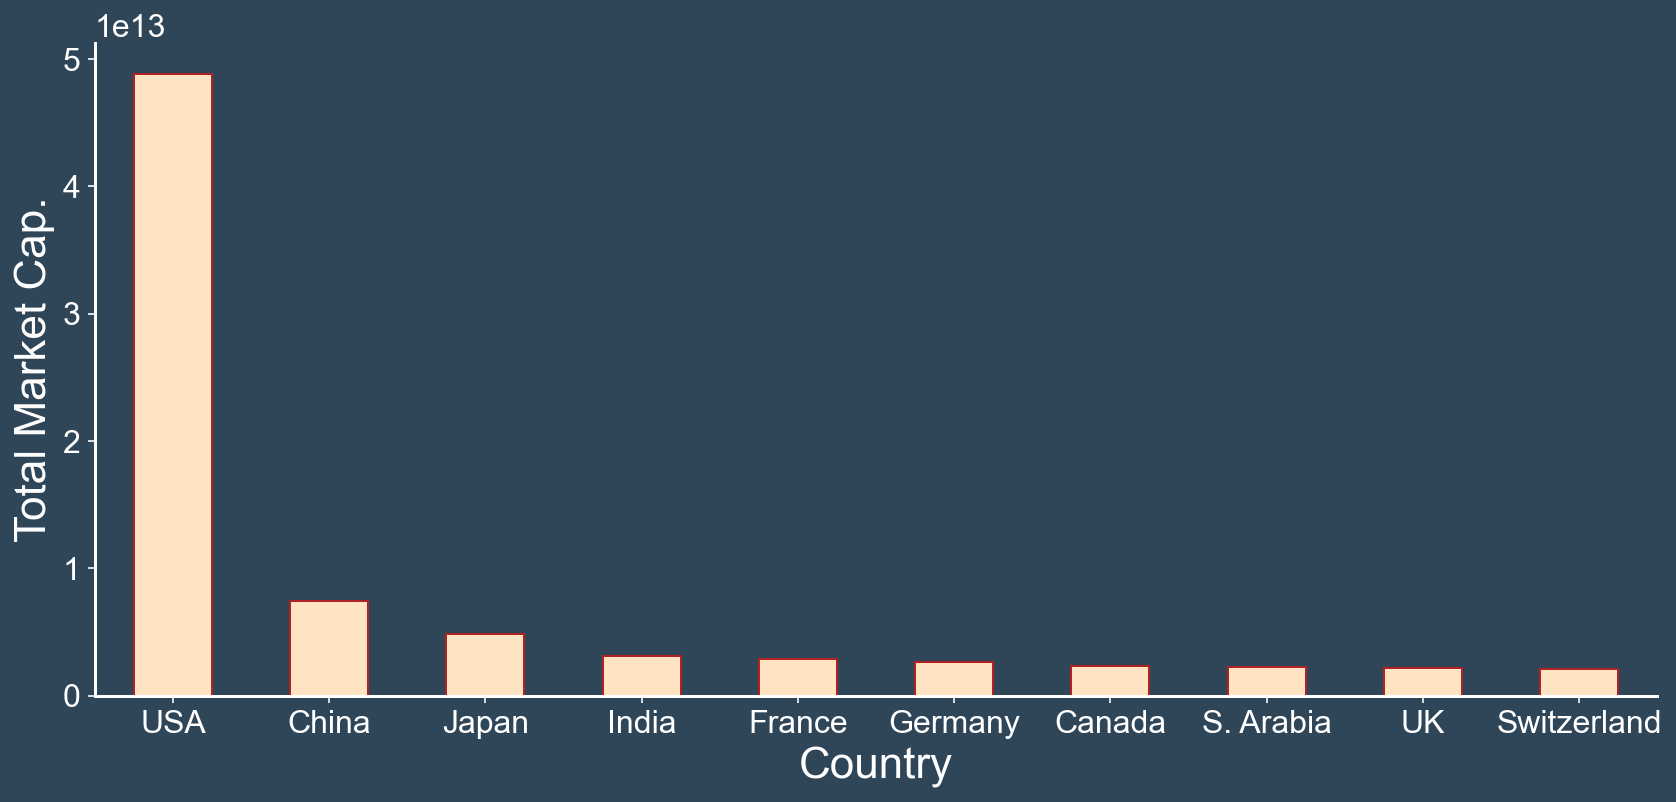

In [10]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#2F4558')

df_total_mc.head(10).plot(kind='bar',
                          color='bisque',
                          edgecolor='firebrick',
                          ax=ax)

ax.set(xlabel='Country', ylabel='Total Market Cap.')

ax.tick_params(axis='x', labelrotation=0)
ax.get_legend().remove();